In [171]:
import matplotlib.pyplot as plt
import numpy as np

In [172]:
image = plt.imread("pearl.jpg")[:,:,:]

In [173]:
image.shape

(947, 800, 3)

In [181]:
def rgb2YCbCr(tensor):
    H, W = tensor.shape[:2]
    YCbCr = np.zeros((H,W,3))
    for i in range(H):
        for j in range(W):
            YCbCr[i,j,0] =    0.299*tensor[i,j,0]  + 0.587*tensor[i,j,1]  + 0.144*tensor[i,j,2]
            YCbCr[i,j,1] = - 0.1687*tensor[i,j,0] - 0.3313*tensor[i,j,1]    + 0.5*tensor[i,j,2] + 128
            YCbCr[i,j,2] =      0.5*tensor[i,j,0] - 0.4187*tensor[i,j,1] - 0.0813*tensor[i,j,2] + 128
    return YCbCr

In [182]:
YCbCr = rgb2YCbCr(image)
Y = YCbCr[:,:,0]

In [183]:
H,W = Y.shape[:2]
factor = 10
Pooled_Y = np.zeros((H//factor,W//factor))
for row in range(0,H-H%factor,factor):
    for column in range(0,W-W%factor,factor):
        sum = 0
        for i in range(factor):
            for j in range(factor):
                if(i+row<H-H%factor and column+j<W-W%factor):
                    sum+=Y[row+i,column+j]
        sum = sum / (factor*factor)
        Pooled_Y[row//factor,column//factor] = sum

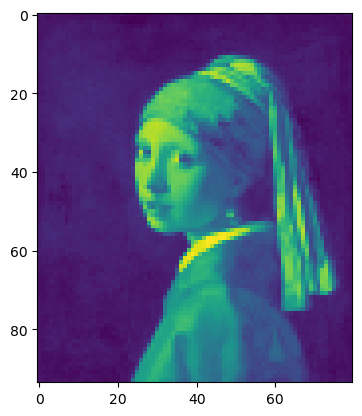

In [184]:
plt.imshow(Pooled_Y)

In [68]:
def rule(val) -> int:
    if(val<25): return 0
    if(val<50): return 25
    if(val<75): return 50
    if(val<100): return 75
    if(val<125): return 100
    if(val<150): return 125
    if(val<175): return 150
    if(val<200): return 175
    if(val<225): return 200
    if(val<250): return 225
    return 250

In [69]:
result = np.zeros((H,W))
for i in range(H):
    for j in range(W):
        result[i,j] = rule(Pooled_Y[i,j])

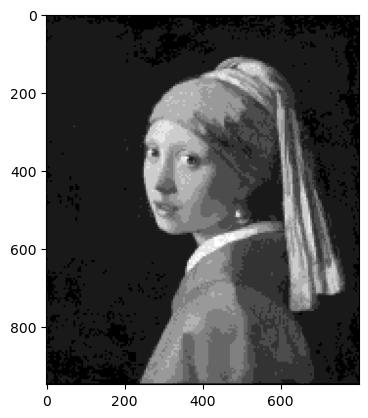

In [70]:
plt.imshow(result,cmap="gray")

In [48]:
Pooled_Y = 255*(Pooled_Y-Pooled_Y.min())/(Pooled_Y.max()-Pooled_Y.min())
def ruleASCII(val) -> chr:
    
#$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'.
    if(val<25): return '##'
    if(val<50): return '@@'
    if(val<75): return '&&'
    if(val<100): return '**'
    if(val<125): return '00'
    if(val<150): return 'XX'
    if(val<175): return 'tt'
    if(val<200): return '(('
    if(val<225): return '++'
    if(val<250): return '::'
    return '..'

result2 = [[] for i in range(H)]
for i in range(H):
    for j in range(W):
        result2[i].append(ruleASCII(Pooled_Y[i,j]))

In [ ]:
H,W = Pooled_Y.shape[:2]
Pooled_Y = 255*(Pooled_Y-Pooled_Y.min())/(Pooled_Y.max()-Pooled_Y.min())

In [94]:

def convASCII(val:int) -> chr:
    asci = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,."
    q = len(asci)/255
    return asci[int(q*val)]+asci[int(q*val)]

result2 = [[] for i in range(H)]
for i in range(H):
    for j in range(W):
        result2[i].append(ruleASCII(Pooled_Y[i,j]))

In [89]:
file_path = "result.txt"

with open(file_path, "w") as f:
    for row in result2:
        row_str = "".join(row)
        f.write(row_str + "\n")

255.0

In [ ]:
H,W = Pooled_Y.shape[:2]
Pooled_Y = 255*(Pooled_Y-Pooled_Y.min())/(Pooled_Y.max()-Pooled_Y.min())

In [200]:

import numpy as np
## Testing with sigmoid:
def sigmoid(val):
    W,B = 0.05,5.7
    return 255/(1+np.e**(-W*val+B))

def sigmoidASCII(val:int) -> chr:
    asci = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,."
    q = len(asci)/255
    return asci[-1*(1+int(q*sigmoid(val)))]+asci[-1*(1+int(q*sigmoid(val)))]


In [201]:
result3 = [[] for i in range(H)]
for i in range(H):
    for j in range(W):
        result3[i].append(sigmoidASCII(Pooled_Y[i,j]))
        

In [202]:
file_path = "result.txt"

with open(file_path, "w") as f:
    for row in result3:
        row_str = "".join(row)
        f.write(row_str + "\n")

In [42]:

plt.figure(figsize=(20, 20))
for i in range(len(result2)):
    for j in range(len(result2[0])):
        plt.text(j, -i, result2[i][j], ha='center', va='center', fontsize=4)

# Adjust plot settings
plt.xlim(-0.5, len(result2[0]) - 0.5)
plt.ylim(-len(result2) + 0.5, 0.5)
plt.axis('off')
plt.show()

KeyboardInterrupt: 

In [169]:
original = plt.imread("pearl.jpg")
YCC = rgb2YCbCr(original)
Y = YCC[:,:,0]
original = Y
H = original.shape[0]
W = original.shape[1]
before = 0
R,C = H,W

altered = np.zeros((H,W))
for i in range(H):
    for j in range(W):
        altered[i,j] = sigmoid(original[i,j])
        
        
        if(before<int(100*(i*C+j)/(R*C))):
            print("#",end="")
            before = int(100*(i*C+j)/(R*C))

###################################################################################################

Text(0.5, 1.0, 'altered')

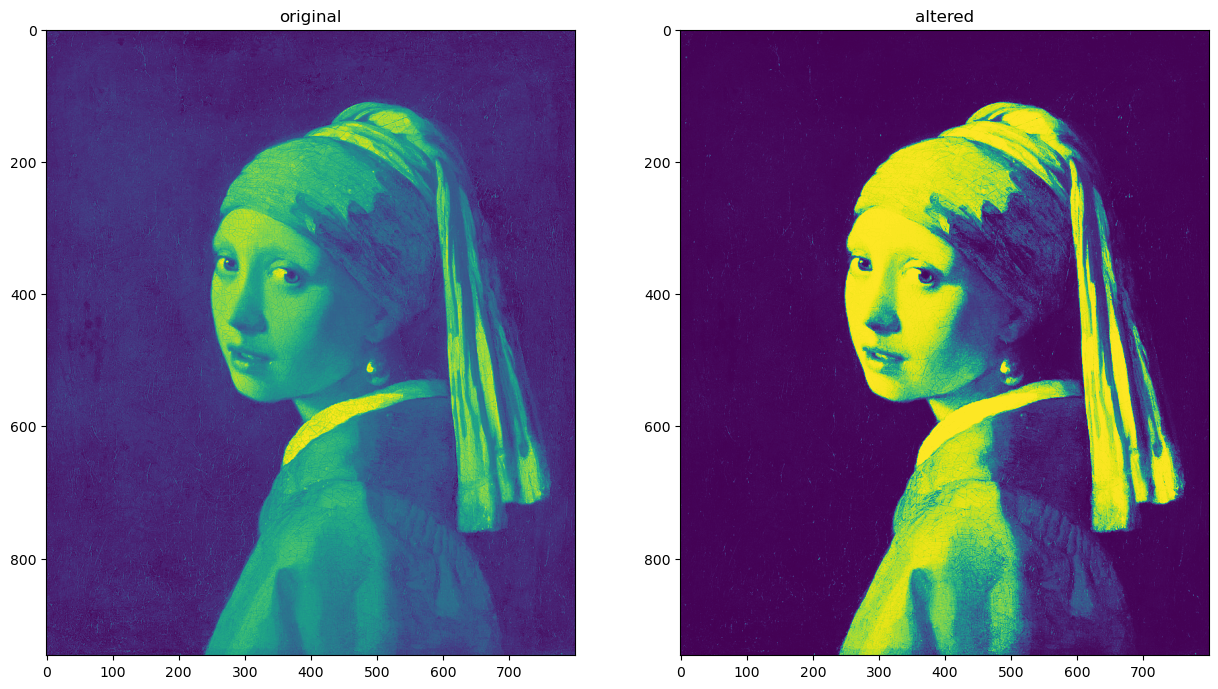

In [170]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(original)
plt.title("original")

plt.subplot(1,2,2)
plt.imshow(altered)
plt.title("altered")

In [154]:
original.shape

(947, 800)

In [141]:
## Loading screen

before = 0
R,C = 10000,100000
for i in range(R):
    for j in range(C):
        if(before<int(100*(i*C+j)/(R*C))):
            print("#",end="")
            before = int(100*(i*C+j)/(R*C))

######

KeyboardInterrupt: 

In [196]:
a = [5,4,3,2,1]
a[-2]

2